In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [64]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
test_ids = test['id']

In [56]:
def clean(data):
    data = data.drop('id', axis=1)
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    encoder = OrdinalEncoder()
    data[categorical_cols] = encoder.fit_transform(data[categorical_cols])
    return data

In [57]:
train = clean(train)
test = clean(test)

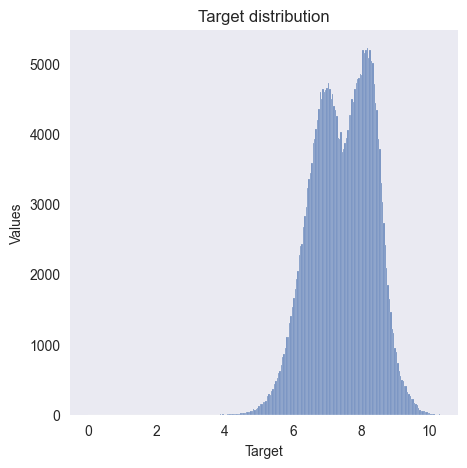

In [58]:
sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(5, 5))

sns.histplot(train['target'], color="b")
ax.xaxis.grid(False)
ax.set(ylabel="Values")
ax.set(xlabel="Target")
ax.set(title="Target distribution")
sns.despine(trim=True, left=True)
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

y = train['target']
X = train.drop('target', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
clf = LinearRegression().fit(X_train, y_train)

In [62]:
predictions = clf.predict(X_val)

In [63]:
submission_preds = clf.predict(test)


In [65]:
df = pd.DataFrame({'id': test_ids.values,
                   'target': submission_preds,
                  })
df.to_csv('../submission/submission.csv', index=False)